## Cleaning and exploration of medical insurance data

#### Importing required modules

In [111]:
# Basic plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import itertools
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 6)
sns.color_palette('bright')

# Feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Test Train split
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Evaluation
from sklearn.metrics import mean_squared_error

#### Reading and describing the data

In [4]:
df = pd.read_csv("medical_insurance.csv")

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##### Checking for null values

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
categorical_features = ['sex', 'smoker', 'region']
for feature in categorical_features:
    print("Distribution of", feature)
    print(df[feature].value_counts())
    print("\n")

Distribution of sex
male      1406
female    1366
Name: sex, dtype: int64


Distribution of smoker
no     2208
yes     564
Name: smoker, dtype: int64


Distribution of region
southeast    766
southwest    684
northwest    664
northeast    658
Name: region, dtype: int64




In [9]:
df.groupby(['sex']).agg({'charges': ['count', 'mean'], 'bmi': 'mean', 'age': 'mean'})


charges                      bmi        age
         count          mean       mean       mean
sex                                               
female    1366  12486.831977  30.434473  39.481698
male      1406  14013.872721  30.960633  38.748222

In [10]:
df.groupby(['children']).agg({'charges': ['count', 'mean'], 'bmi': 'mean', 'age': 'mean'})

charges                      bmi        age
           count          mean       mean       mean
children                                            
0           1186  12317.920881  30.628508  38.431703
1            672  12722.650521  30.705744  39.300595
2            496  15268.182723  31.035806  39.286290
3            324  15304.070620  30.580000  41.395062
4             52  13550.983876  31.314615  38.769231
5             42   8706.036629  28.915000  35.904762

In [11]:
df.groupby(['region']).agg({'charges': ['count', 'mean'], 'bmi': 'mean', 'age': 'mean'})

charges                      bmi        age
            count          mean       mean       mean
region                                               
northeast     658  13475.874737  29.157781  39.243161
northwest     664  12463.129315  29.147259  39.081325
southeast     766  14748.777706  33.478773  38.762402
southwest     684  12164.196435  30.584503  39.397661

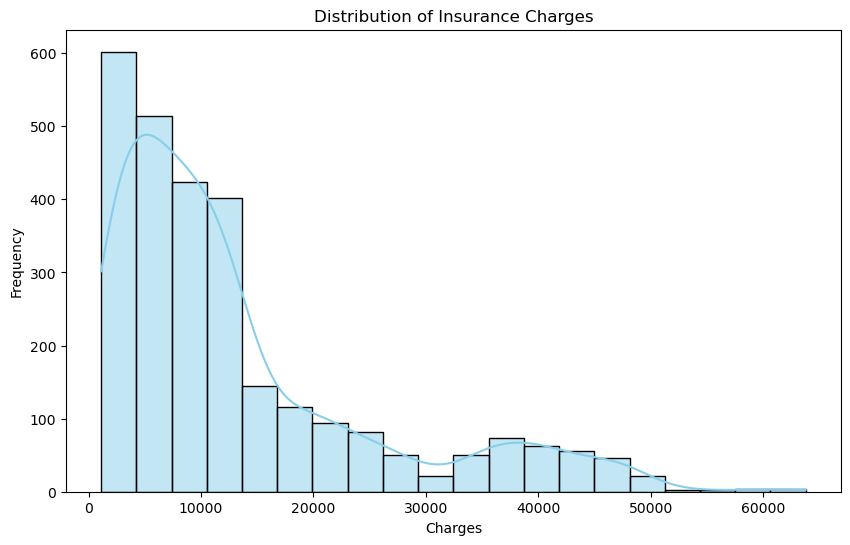

In [12]:
sns.histplot(df['charges'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

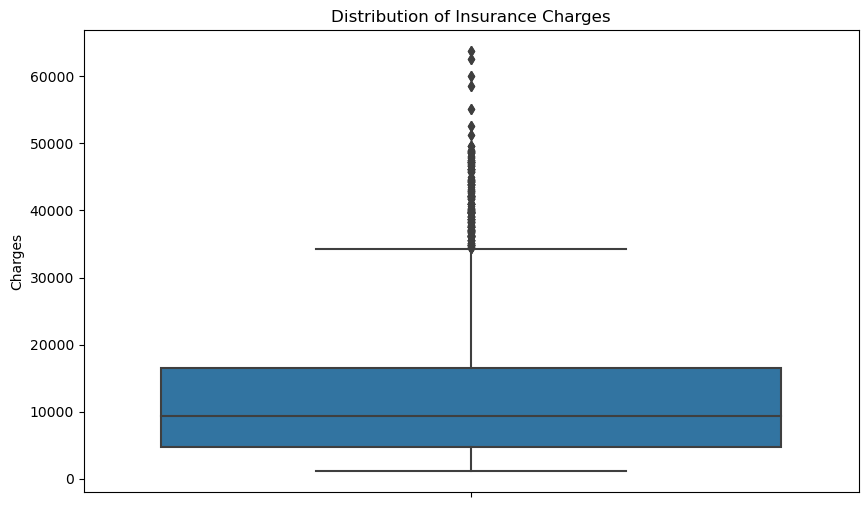

In [13]:
sns.boxplot(y='charges', data=df)
plt.title('Distribution of Insurance Charges')
plt.ylabel('Charges')
# plt.ylabel('Frequency')
plt.show()

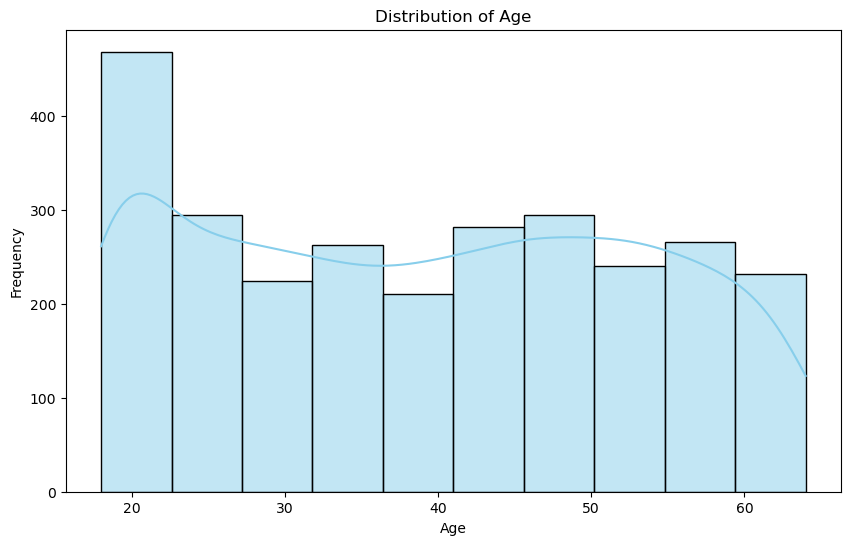

In [14]:
sns.histplot(df['age'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

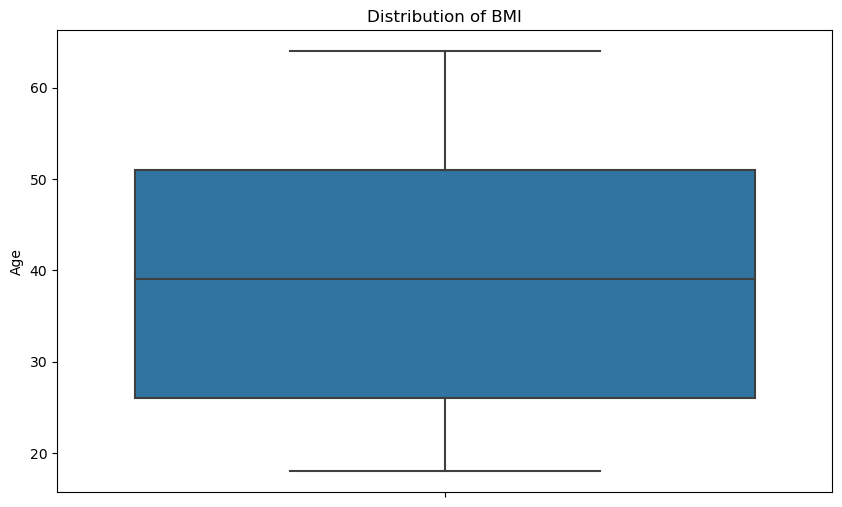

In [15]:
sns.boxplot(y='age', data=df)
plt.title('Distribution of BMI')
plt.ylabel('Age')
# plt.ylabel('Frequency')
plt.show()

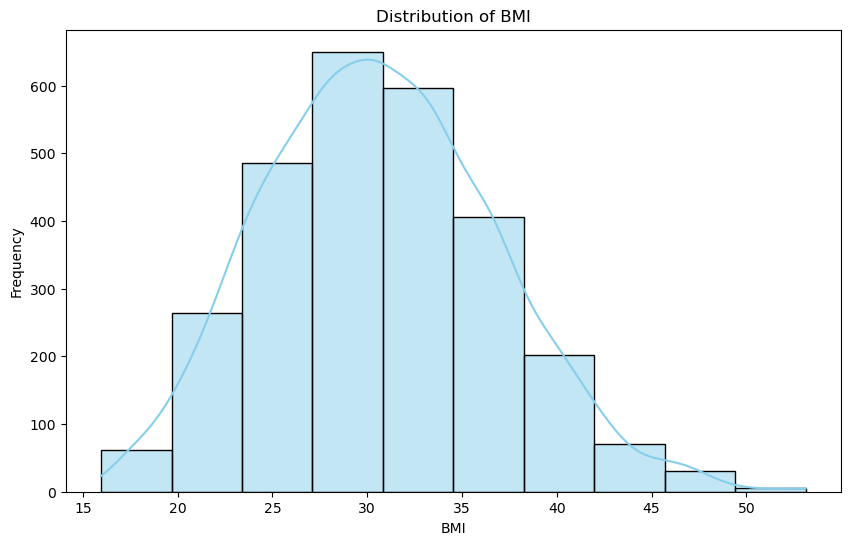

In [16]:
sns.histplot(df['bmi'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

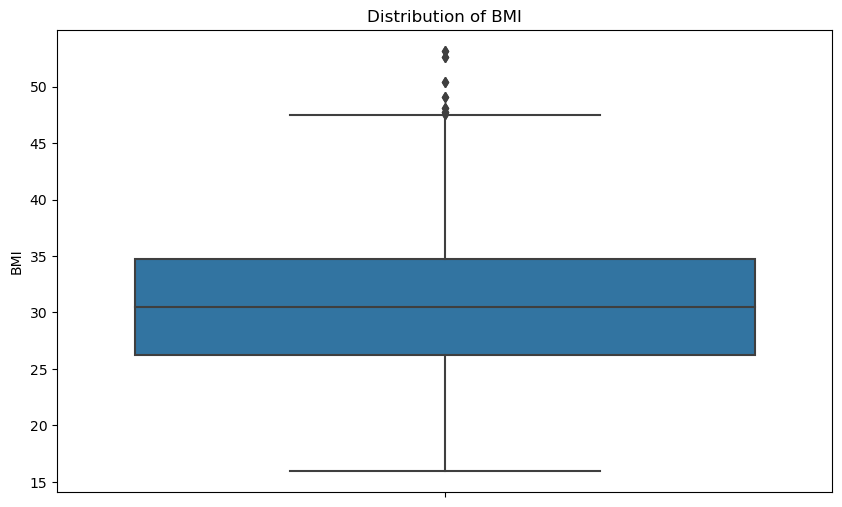

In [17]:
sns.boxplot(y='bmi', data=df)
plt.title('Distribution of BMI')
plt.ylabel('BMI')
# plt.ylabel('Frequency')
plt.show()

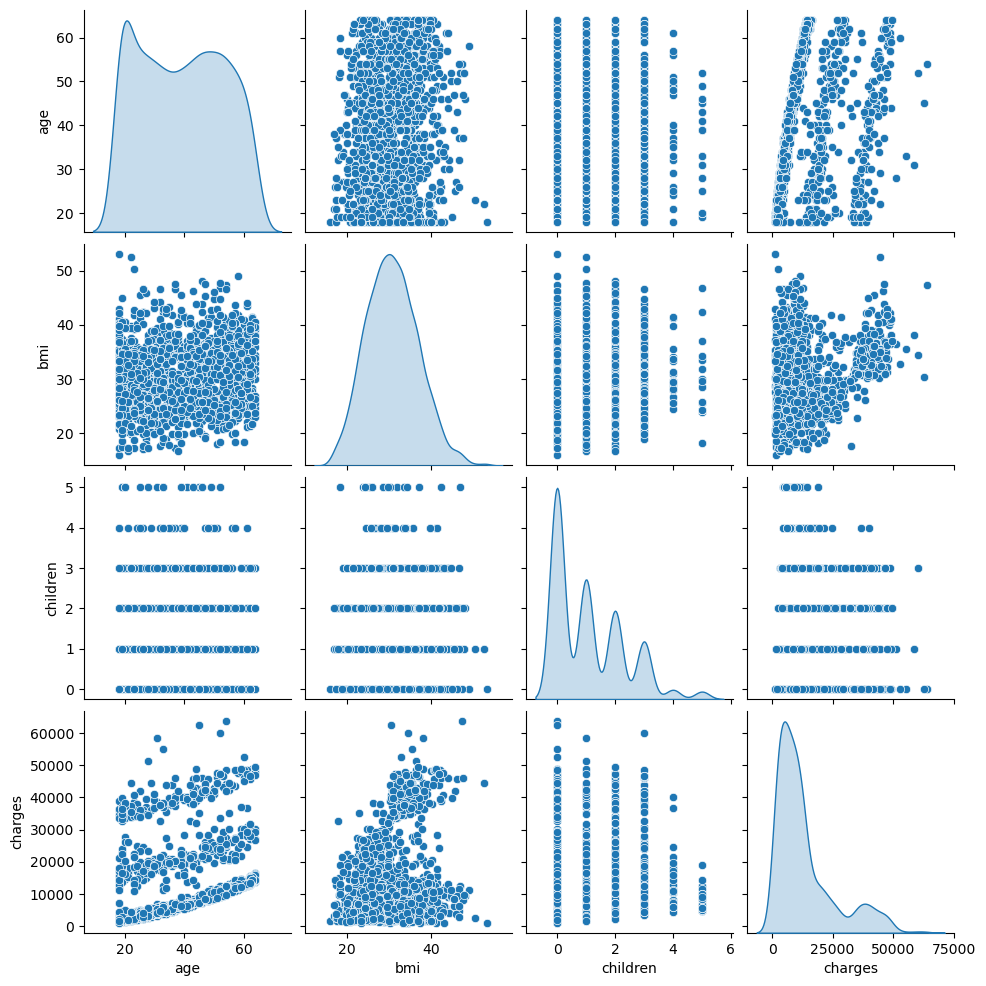

In [18]:
sns.pairplot(df, diag_kind='kde')
plt.show()

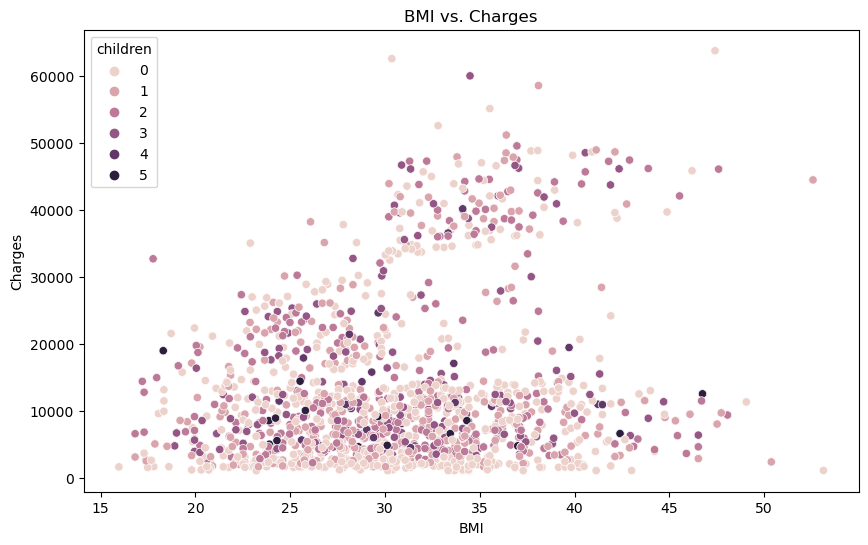

In [19]:
sns.scatterplot(data=df, x="bmi", y="charges", hue="children")    
#plt.plot(actual, actual, color='red', linestyle='--')  # Add a line of perfect prediction (y=x)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs. Charges')
plt.show()

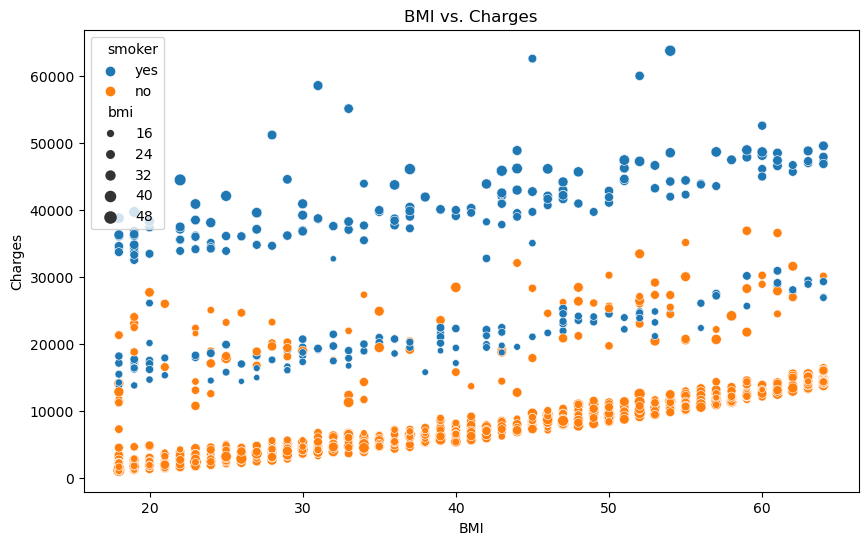

In [20]:
sns.scatterplot(data=df, x="age", y="charges", hue="smoker", size="bmi")    
#plt.plot(actual, actual, color='red', linestyle='--')  # Add a line of perfect prediction (y=x)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs. Charges')
plt.show()

categorical_features = ['sex', 'smoker', 'region']

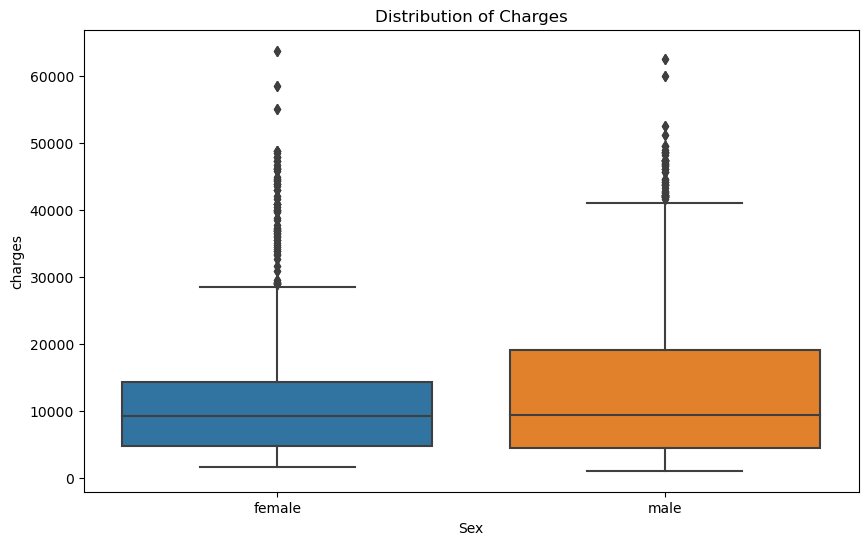

In [21]:
sns.boxplot(y='charges', x= "sex", data=df)
plt.title('Distribution of Charges')
plt.xlabel('Sex')
# plt.ylabel('Frequency')
plt.show()

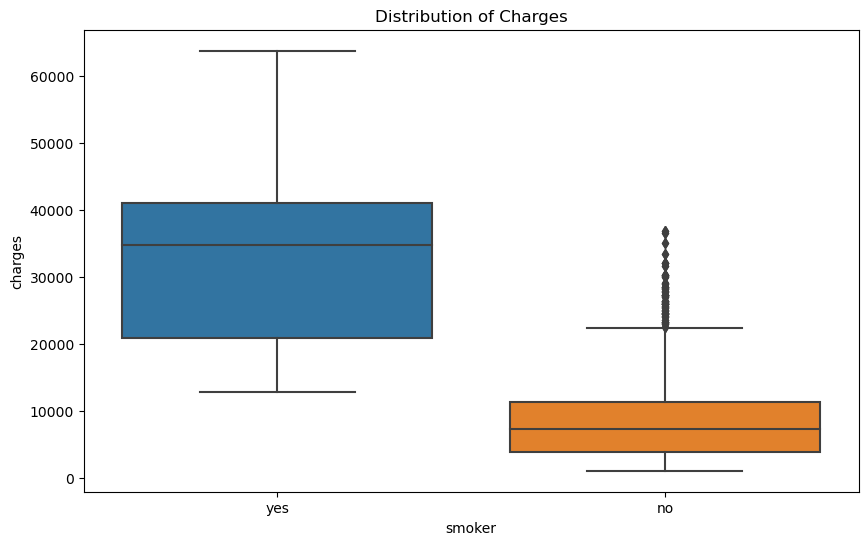

In [22]:
sns.boxplot(y='charges', x= "smoker", data=df)
plt.title('Distribution of Charges')
plt.xlabel('smoker')
# plt.ylabel('Frequency')
plt.show()

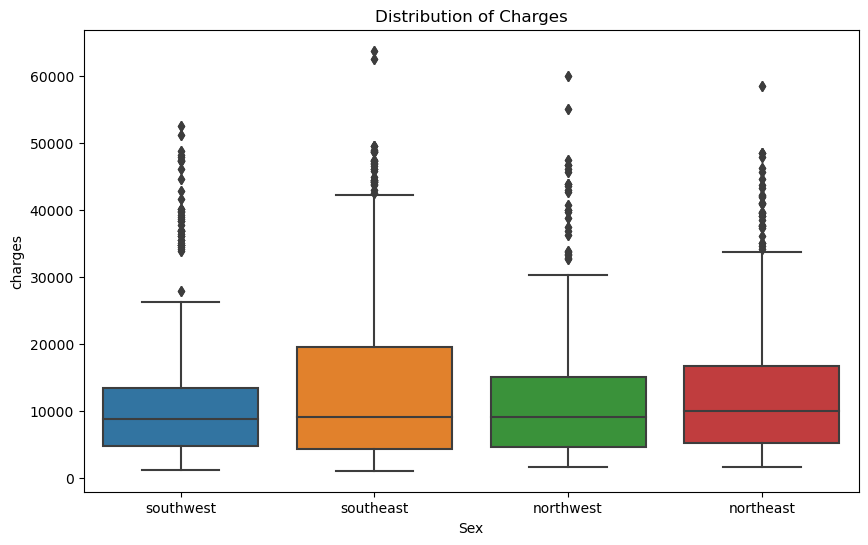

In [23]:
sns.boxplot(y='charges', x= "region", data=df)
plt.title('Distribution of Charges')
plt.xlabel('Sex')
# plt.ylabel('Frequency')
plt.show()

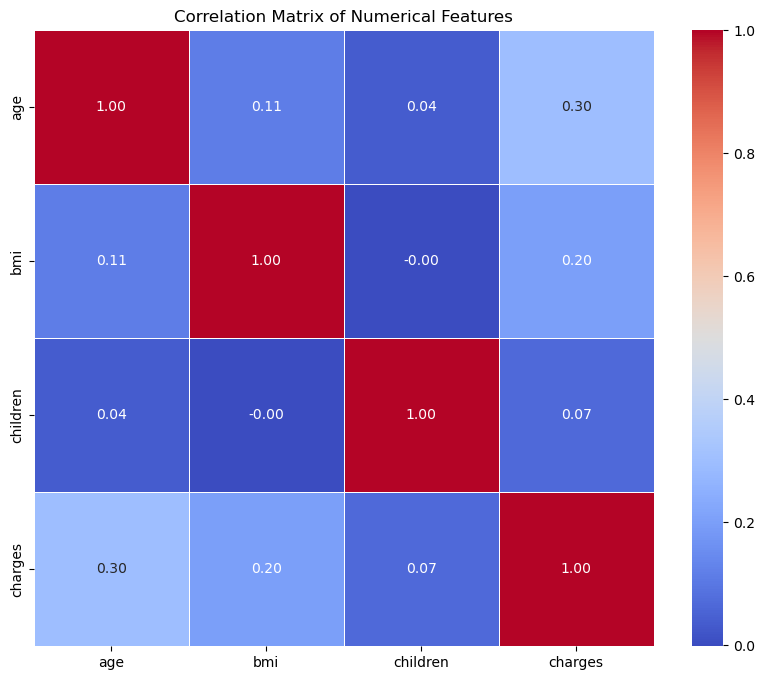

In [24]:
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#### Test Train Split

In [25]:
# Separate features (X) and target variable (y)
X = df.drop('charges', axis=1)
y = df['charges']

# Split the dataset into training and testing sets
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = X_train_orig.copy()
X_test = X_test_orig.copy()

#### Scaling X and Y

In [26]:
X_scaler = StandardScaler()
X_scaler.fit(X_train[['age','bmi','children']])
print(X_scaler.mean_)

[39.16779432 30.64284844  1.10509698]


In [27]:
X_scaled_df = X_scaler.transform(X_train[['age','bmi','children']])
X_scaled_df = pd.DataFrame(X_scaled_df, columns=('sc_age','sc_bmi','sc_children'), index=X_train.index)

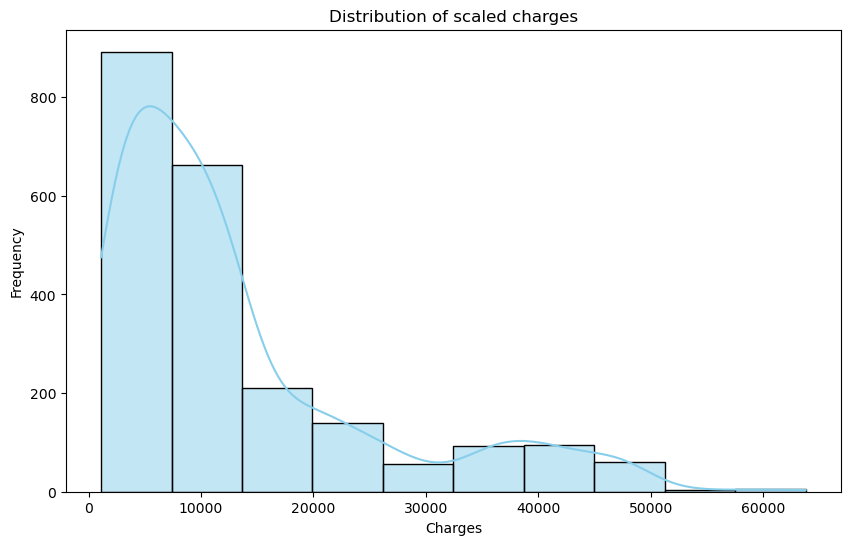

In [28]:
sns.histplot(y_train, kde=True, bins=10, color='skyblue')
plt.title('Distribution of scaled charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

##### Encoding Categorical Variables

In [29]:
region_OHencoder = OneHotEncoder(sparse=False)
new_df = region_OHencoder.fit_transform(X_train[['region']])
en_df = pd.DataFrame(new_df, columns=("northeast","northwest","southeast","southwest"), index=X_train.index)
en_df.drop(columns=["northeast"], inplace=True)
cols_float = ["northwest","southeast","southwest"]
en_df = en_df.applymap(np.int64)

In [30]:
# Initialize LabelEncoder
label_encoder_sex = LabelEncoder()
label_encoder_smoker = LabelEncoder()

# Encode 'Sex', 'Smoker', and 'Region' columns
X_train['sex'] = label_encoder_sex.fit_transform(X_train['sex'])
X_train['smoker'] = label_encoder_smoker.fit_transform(X_train['smoker'])

In [31]:
cat_encoded = X_train.join(en_df)
cat_encoded.drop(columns=["age", "bmi", "region","children"], inplace=True)

In [32]:
X_train_scaled = cat_encoded.join(X_scaled_df)

In [33]:
X_train_scaled.isnull().sum()

sex            0
smoker         0
northwest      0
southeast      0
southwest      0
sc_age         0
sc_bmi         0
sc_children    0
dtype: int64

In [34]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
print(lr_model.feature_names_in_)
print(lr_model.coef_)

['sex' 'smoker' 'northwest' 'southeast' 'southwest' 'sc_age' 'sc_bmi'
 'sc_children']
[   71.3591554  24127.95398808  -364.69081218 -1096.35527887
 -1257.29572202  3609.75962584  2027.82202636   592.0813743 ]


In [35]:
#Prepare X test same way
X_test_scaled_cont = X_scaler.transform(X_test[['age','bmi','children']])
X_test_scaled_cont = pd.DataFrame(X_test_scaled_cont, columns=('sc_age','sc_bmi','sc_children'), index=X_test.index)

X_test_ohe_reg = region_OHencoder.transform(X_test[['region']])
X_test_ohe_reg = pd.DataFrame(X_test_ohe_reg, columns=("northeast","northwest","southeast","southwest"), index=X_test.index)
X_test_ohe_reg.drop(columns=["northeast"], inplace=True)
X_test_ohe_reg = X_test_ohe_reg.applymap(np.int64)

# Encode 'Sex', 'Smoker'
X_test['sex'] = label_encoder_sex.transform(X_test['sex'])
X_test['smoker'] = label_encoder_smoker.transform(X_test['smoker'])


X_test_cat_encoded = X_test.join(X_test_ohe_reg)
X_test_cat_encoded.drop(columns=["age", "bmi", "region","children"], inplace=True)

X_test_scaled = X_test_cat_encoded.join(X_test_scaled_cont)

In [36]:
# Make predictions on the test set
lr_predictions = lr_model.predict(X_test_scaled)

# Compute the Mean Squared Error (MSE) of the Linear Regression model
lr_mse = mean_squared_error(y_test, lr_predictions)
print("Mean Squared Error (Linear Regression):", lr_mse)

Mean Squared Error (Linear Regression): 38900272.046195954


In [37]:
r_sqr = lr_model.score(X_test_scaled, y_test)
r_sqr

0.7301193125952314

In [38]:
print(f"intercept: {lr_model.intercept_}")
print(f"slope: {lr_model.coef_}")

intercept: 9071.29331820552
slope: [   71.3591554  24127.95398808  -364.69081218 -1096.35527887
 -1257.29572202  3609.75962584  2027.82202636   592.0813743 ]


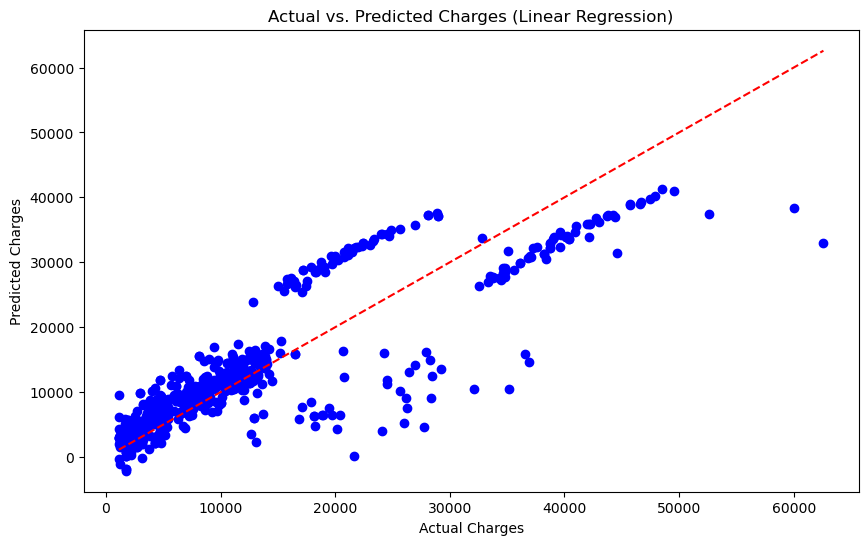

In [39]:
plt.scatter(y_test, lr_predictions, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges (Linear Regression)')
plt.show()


In [40]:
train_pred_df = X_train_orig.copy()
train_pred_df['charges'] = y_train.to_list()
train_pred_df['charges_pred'] = lr_model.predict(X_train_scaled)

In [41]:
train_pred_df

,age,sex,bmi,children,smoker,region,charges,charges_pred
1410,37,male,28.025,2,no,northwest,6203.90175,7792.769126
0,19,female,27.900,0,yes,southwest,16884.92400,25347.852062
221,53,female,33.250,0,no,northeast,10564.88450,12930.168330
1696,50,male,26.600,0,no,southwest,8444.47400,8779.040838
1625,44,male,38.060,1,no,southeast,7152.67140,11682.140044
...,...,...,...,...,...,...,...,...
2385,36,female,26.885,0,no,northwest,5267.81815,6118.812077
1790,31,male,20.400,0,no,southwest,3260.19900,1876.119649
189,29,female,32.110,2,no,northwest,4922.91590,7028.937184
2151,57,female,31.825,0,no,northwest,11842.62375,13115.903619


In [42]:
train_lr_mse = mean_squared_error(train_pred_df['charges'], train_pred_df['charges_pred'])
print("Mean Squared Error (Linear Regression):", train_lr_mse)

Mean Squared Error (Linear Regression): 36255367.264003396


In [43]:
test_pred_df = X_test_orig.copy()
test_pred_df['charges'] = y_test.to_list()
test_pred_df['charges_pred'] = lr_model.predict(X_test_scaled)

In [44]:
test_lr_mse = mean_squared_error(test_pred_df['charges'], test_pred_df['charges_pred'])
print("Mean Squared Error (Linear Regression):", test_lr_mse)

Mean Squared Error (Linear Regression): 38900272.046195954


In [45]:
test_pred_df['residual'] = test_pred_df['charges'] - test_pred_df['charges_pred']

In [46]:
test_pred_df['residual']

2210     1051.807483
2165    -1321.991617
1104    13903.722357
157    -10001.838322
1249     5230.852900
            ...     
76      -1031.455206
1097    -2484.832457
2117     1754.527601
2607     -223.619485
1807     7659.663111
Name: residual, Length: 555, dtype: float64

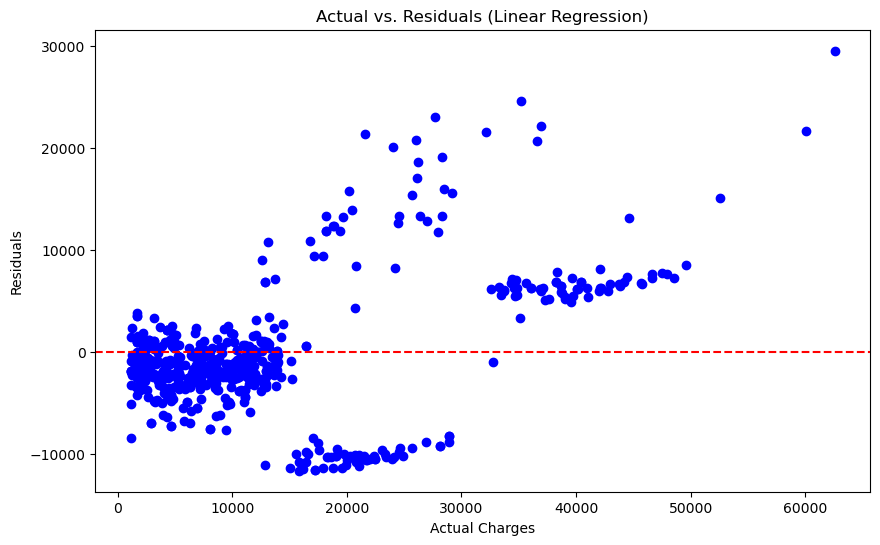

In [47]:
plt.scatter(y=test_pred_df['residual'], x=test_pred_df['charges'], color='blue')
plt.plot(color='red', linestyle='--')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Charges')
plt.ylabel('Residuals')
plt.title('Actual vs. Residuals (Linear Regression)')
plt.show()


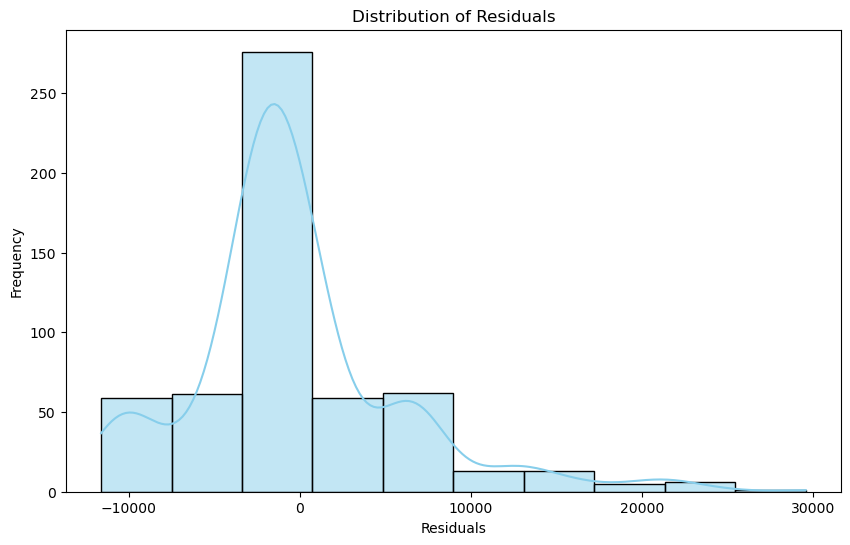

In [48]:
sns.histplot(test_pred_df['residual'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [49]:
def act_vs_pred_plot(actual, predicted):
    plt.scatter(actual, predicted, color='blue')
    plt.plot(actual, actual, color='red', linestyle='--')  # Add a line of perfect prediction (y=x)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')
    plt.show()
    return None

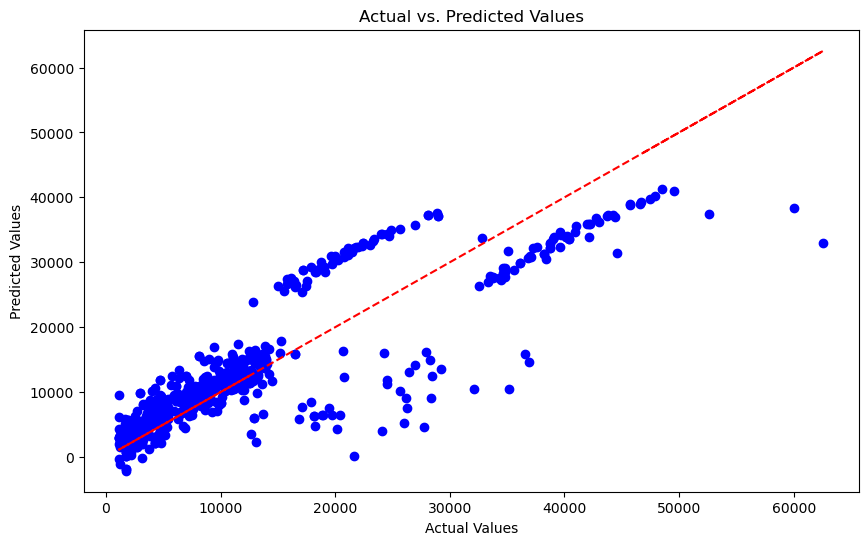

In [50]:
act_vs_pred_plot(test_pred_df['charges'], test_pred_df['charges_pred'])
# Scale the cefficients
# Regulaization parameter
# Change test train split before scaling
# 

In [51]:
categorical_features = ['sex', 'smoker', 'region']
for feature in categorical_features:
    print("Distribution of", feature , " in Xtrain")
    print(X_train[feature].value_counts())
    print("\n")
    print("Distribution of", feature , " in Xtest")
    print(X_test[feature].value_counts())
    print("="*20)
    print("\n")

Distribution of sex  in Xtrain
1    1113
0    1104
Name: sex, dtype: int64


Distribution of sex  in Xtest
1    293
0    262
Name: sex, dtype: int64


Distribution of smoker  in Xtrain
0    1771
1     446
Name: smoker, dtype: int64


Distribution of smoker  in Xtest
0    437
1    118
Name: smoker, dtype: int64


Distribution of region  in Xtrain
southeast    620
southwest    541
northeast    529
northwest    527
Name: region, dtype: int64


Distribution of region  in Xtest
southeast    146
southwest    143
northwest    137
northeast    129
Name: region, dtype: int64




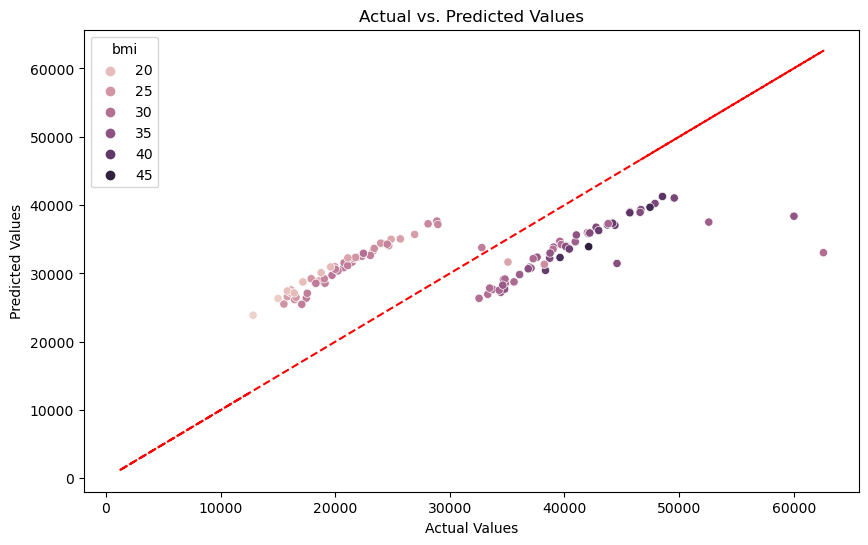

In [52]:
sns.scatterplot(data=test_pred_df[test_pred_df['smoker'] == 'yes'], x='charges', y='charges_pred', hue='bmi')
plt.plot(test_pred_df['charges'], test_pred_df['charges'], color='red', linestyle='--')  # Add a line of perfect prediction (y=x)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

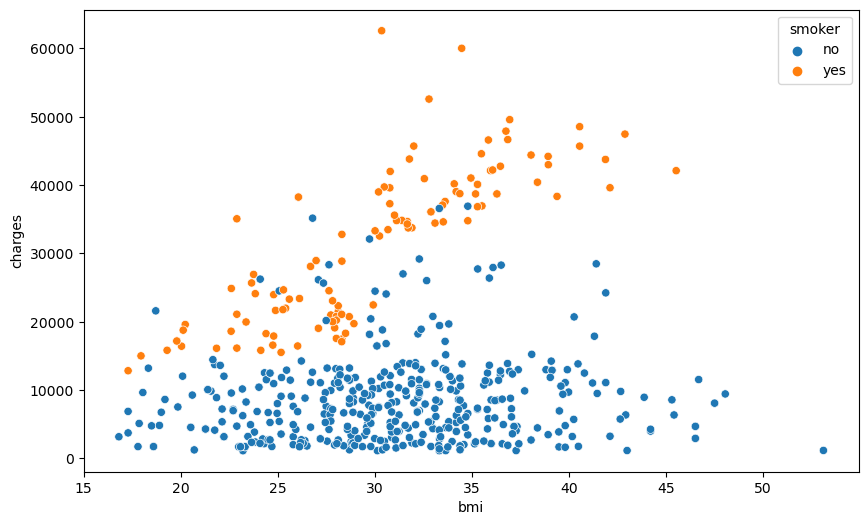

In [53]:
sns.scatterplot(data=test_pred_df, x='bmi', y='charges', hue='smoker')
#plt.plot(test_df['charges'], test_df['charges'], color='red', linestyle='--')  # Add a line of perfect prediction (y=x)
plt.show()

In [54]:
test_pred_df[(test_pred_df['smoker'] == 'yes') & (test_pred_df['residual'] > 0)].describe()

,age,bmi,children,charges,charges_pred,residual
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,37.419355,34.372097,1.225806,40581.640266,33300.439101,7281.201164
std,12.922909,4.126702,1.165338,5956.296642,3964.153133,3808.279794
min,18.000000,22.895000,0.000000,32548.340500,26357.229902,3407.263620
25%,27.000000,31.680000,0.000000,36273.281000,30504.593122,6039.471246
50%,37.000000,34.295000,1.000000,39604.582450,33284.702965,6349.738811
75%,45.000000,36.435000,2.000000,43560.867413,36200.564064,7036.844395
max,64.000000,45.540000,4.000000,62592.873090,41259.088447,29558.654035


In [55]:
test_pred_df[(test_pred_df['smoker'] == 'yes') & (test_pred_df['residual'] < 0)].describe()

,age,bmi,children,charges,charges_pred,residual
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,38.946429,25.304643,1.142857,20907.874573,30945.271113,-10037.396540
std,12.618053,3.180430,1.085919,4230.501996,3486.661302,1495.431454
min,18.000000,17.290000,0.000000,12829.455100,23882.897068,-11607.493846
25%,29.750000,23.583750,0.000000,17537.530787,28546.785922,-10733.670953
50%,39.000000,25.815000,1.000000,20490.421925,30961.232470,-10218.878967
75%,47.000000,28.025000,2.000000,23330.236688,33382.041601,-9688.672320
max,64.000000,29.925000,4.000000,32787.458590,37659.651236,-989.659326


In [94]:
X_train_bmi_cat = X_train_orig.copy()

In [95]:
X_train_bmi_cat.head()

,age,sex,bmi,children,smoker,region
1410,37,male,28.025,2,no,northwest
0,19,female,27.900,0,yes,southwest
221,53,female,33.250,0,no,northeast
1696,50,male,26.600,0,no,southwest
1625,44,male,38.060,1,no,southeast


In [96]:
label_encoder_sex_bmi_cat = LabelEncoder()
label_encoder_smoker_bmi_cat = LabelEncoder()

# Encode 'Sex', 'Smoker', and 'Region' columns
X_train_bmi_cat['sex'] = label_encoder_sex_bmi_cat.fit_transform(X_train_bmi_cat['sex'])
X_train_bmi_cat['smoker'] = label_encoder_smoker_bmi_cat.fit_transform(X_train_bmi_cat['smoker'])

In [97]:
X_train_bmi_cat['bmi_gt_30'] = 0
X_train_bmi_cat.loc[X_train_bmi_cat['bmi'] >= 30, 'bmi_gt_30'] = 1

In [98]:
cat_enc_bmi_cat = X_train_bmi_cat.join(en_df)
cat_enc_bmi_cat.drop(columns=["age", "bmi", "region","children"], inplace=True)
X_train_scaled_bmi_cat = cat_enc_bmi_cat.join(X_scaled_df)

In [99]:
X_train_scaled_bmi_cat.head()

,sex,smoker,bmi_gt_30,northwest,southeast,southwest,sc_age,sc_bmi,sc_children
1410,1,0,0,1,0,0,-0.153382,-0.426886,0.733224
0,0,1,0,0,0,1,-1.426971,-0.447269,-0.905443
221,0,0,1,0,0,0,0.978697,0.425141,-0.905443
1696,1,0,0,0,0,1,0.766432,-0.659257,-0.905443
1625,1,0,1,0,1,0,0.341902,1.209495,-0.086109


In [102]:
# Initialize and train the Linear Regression model
# 'smoker','bmi_gt_30','sc_age','sc_bmi','sc_children','northwest','southeast','southwest']
train_var = ['smoker','bmi_gt_30','sc_age','sc_bmi']
lr_model_bmi_cat = LinearRegression()
lr_model_bmi_cat.fit(X_train_scaled_bmi_cat[train_var], y_train)
print(lr_model_bmi_cat.feature_names_in_)
print(lr_model_bmi_cat.coef_)

['smoker' 'bmi_gt_30' 'sc_age' 'sc_bmi']
[24106.29899962  2594.45510773  3641.26425312   870.49549972]


In [101]:
X_test_bmi_cat = X_test_orig.copy()

# Encode 'Sex', 'Smoker'

X_test_bmi_cat['sex'] = label_encoder_sex_bmi_cat.transform(X_test_bmi_cat['sex'])
X_test_bmi_cat['smoker'] = label_encoder_smoker_bmi_cat.transform(X_test_bmi_cat['smoker'])

X_test_bmi_cat['bmi_gt_30'] = 0
X_test_bmi_cat.loc[X_test_bmi_cat['bmi'] >= 30, 'bmi_gt_30'] = 1

X_test_cat_enc_bmi_cat = X_test_bmi_cat.join(X_test_ohe_reg)
X_test_cat_enc_bmi_cat.drop(columns=["age", "bmi", "region","children"], inplace=True)

X_test_scaled_bmi_cat = X_test_cat_enc_bmi_cat.join(X_test_scaled_cont)
# Make predictions on the test set
lr_predictions_bmi_cat = lr_model_bmi_cat.predict(X_test_scaled_bmi_cat)

# Compute the Mean Squared Error (MSE) of the Linear Regression model
lr_mse_bmi_cat = mean_squared_error(y_test, lr_predictions_bmi_cat)
print("Mean Squared Error (Linear Regression):", lr_mse_bmi_cat)
print(f"Root mean Squared Error: {lr_mse_bmi_cat**0.5}")
r_sqr = lr_model_bmi_cat.score(X_test_scaled_bmi_cat, y_test)
print(f"r_sqr: {r_sqr}")
print(f"intercept: {lr_model_bmi_cat.intercept_}")
print(f"slope: {lr_model_bmi_cat.coef_}")

ValueError: X has 9 features, but LinearRegression is expecting 7 features as input.

In [64]:
X_test_scaled_bmi_cat[X_test_scaled_bmi_cat['bmi_gt_30'] == 1]

,sex,smoker,bmi_gt_30,northwest,southeast,southwest,sc_age,sc_bmi,sc_children
1249,1,1,1,0,0,0,-0.507157,0.487107,-0.086109
1122,0,1,1,1,0,0,0.978697,1.013815,1.552557
286,0,0,1,0,0,0,0.483412,2.841800,0.733224
544,1,0,1,1,0,0,1.049452,-0.070583,-0.905443
1018,0,0,1,1,0,0,1.049452,0.843409,1.552557
...,...,...,...,...,...,...,...,...,...
623,1,1,1,0,0,0,-1.497726,0.471616,-0.905443
515,1,0,1,0,0,1,1.332471,0.824656,-0.905443
1146,1,1,1,0,0,1,1.473981,0.351761,-0.905443
1097,1,0,1,0,1,0,-1.214706,0.509936,-0.905443


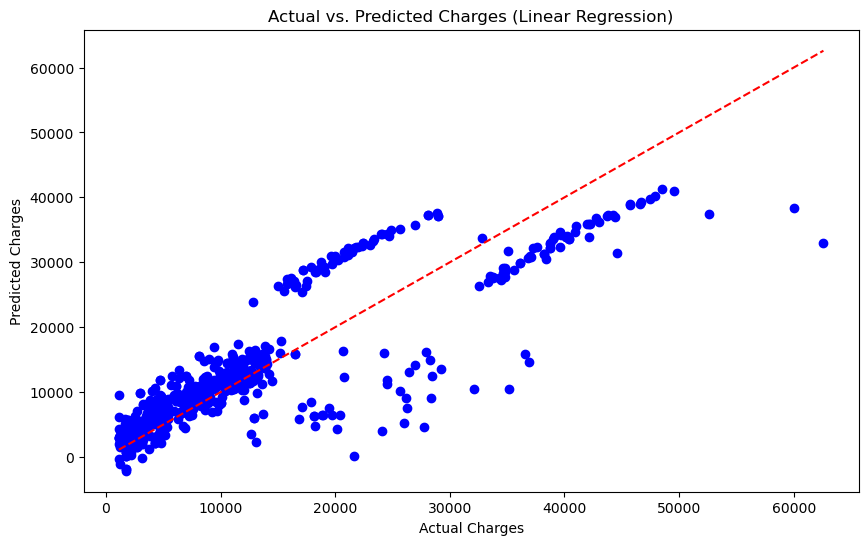

In [65]:
plt.scatter(y_test, lr_predictions, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges (Linear Regression)')
plt.show()

In [68]:
test_pred_df['charges_pred_bmi_cat'] = lr_model_bmi_cat.predict(X_test_scaled_bmi_cat)

In [69]:
train_pred_df['charges_pred_bmi_cat'] = lr_model_bmi_cat.predict(X_train_scaled_bmi_cat)


In [70]:
test_pred_df

,age,sex,bmi,children,smoker,region,charges,charges_pred,residual,charges_pred_bmi_cat
2210,60,male,24.320,0,no,northwest,12523.60480,11471.797317,1051.807483,11130.924603
2165,53,male,28.880,0,no,northwest,9869.81020,11191.801817,-1321.991617,10067.473207
1104,37,male,29.800,0,no,southwest,20420.60465,6516.882293,13903.722357,5280.006736
157,18,male,25.175,0,yes,northeast,15518.18025,25520.018572,-10001.838322,25027.315493
1249,32,male,33.630,1,yes,northeast,37607.52770,32376.674800,5230.852900,33011.436488
...,...,...,...,...,...,...,...,...,...,...
76,29,female,29.590,1,no,southeast,3947.41310,4978.868306,-1031.455206,3951.111073
1097,22,male,33.770,0,no,southeast,1674.63230,4159.464757,-2484.832457,4935.752505
2117,53,male,21.400,1,no,southwest,10065.41300,8310.885399,1754.527601,8531.555532
2607,40,male,24.970,2,no,southeast,6593.50830,6817.127785,-223.619485,6578.093263


In [71]:
test_pred_df['res_bmi_cat'] = test_pred_df['charges'] - test_pred_df['charges_pred_bmi_cat']

In [80]:
test_pred_df['bmi_gt_30'] = 0
test_pred_df.loc[test_pred_df['bmi'] >= 30, 'bmi_gt_30'] = 1

In [88]:
test_pred_df

,age,sex,bmi,children,smoker,region,charges,charges_pred,residual,charges_pred_bmi_cat,res_bmi_cat,bmi_gt_30
2210,60,male,24.320,0,no,northwest,12523.60480,11471.797317,1051.807483,11130.924603,1392.680197,0
2165,53,male,28.880,0,no,northwest,9869.81020,11191.801817,-1321.991617,10067.473207,-197.663007,0
1104,37,male,29.800,0,no,southwest,20420.60465,6516.882293,13903.722357,5280.006736,15140.597914,0
157,18,male,25.175,0,yes,northeast,15518.18025,25520.018572,-10001.838322,25027.315493,-9509.135243,0
1249,32,male,33.630,1,yes,northeast,37607.52770,32376.674800,5230.852900,33011.436488,4596.091212,1
...,...,...,...,...,...,...,...,...,...,...,...,...
76,29,female,29.590,1,no,southeast,3947.41310,4978.868306,-1031.455206,3951.111073,-3.697973,0
1097,22,male,33.770,0,no,southeast,1674.63230,4159.464757,-2484.832457,4935.752505,-3261.120205,1
2117,53,male,21.400,1,no,southwest,10065.41300,8310.885399,1754.527601,8531.555532,1533.857468,0
2607,40,male,24.970,2,no,southeast,6593.50830,6817.127785,-223.619485,6578.093263,15.415037,0


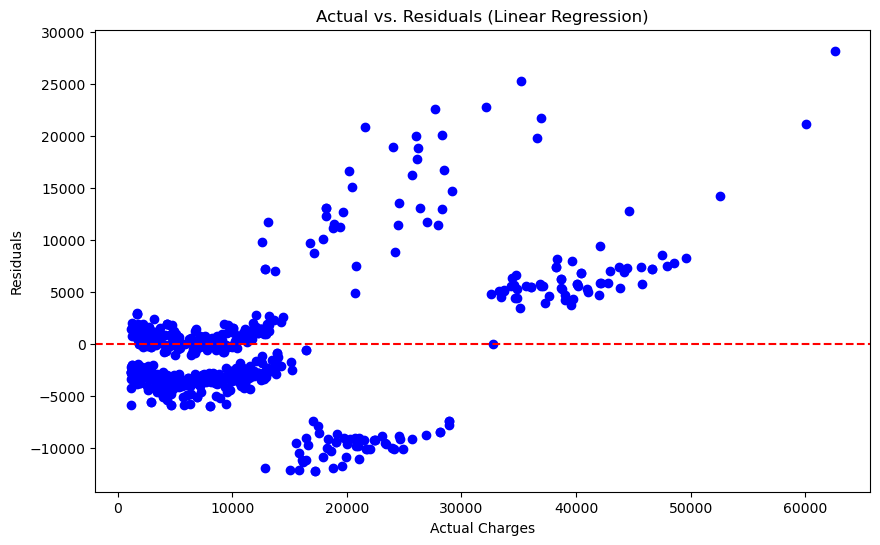

In [82]:
plt.scatter(y=test_pred_df['res_bmi_cat'], x=test_pred_df['charges'], color='blue')
plt.plot(color='red', linestyle='--')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Charges')
plt.ylabel('Residuals')
plt.title('Actual vs. Residuals (Linear Regression)')
plt.show()


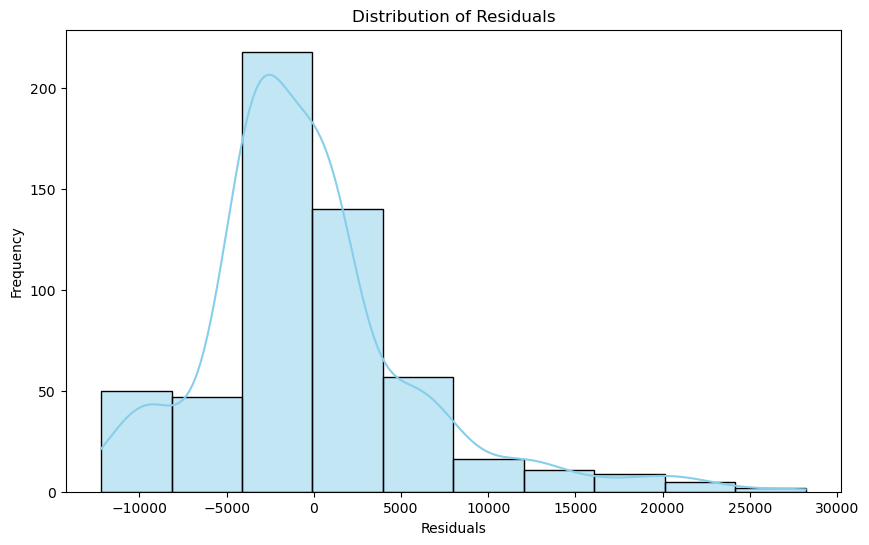

In [83]:
sns.histplot(test_pred_df['res_bmi_cat'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

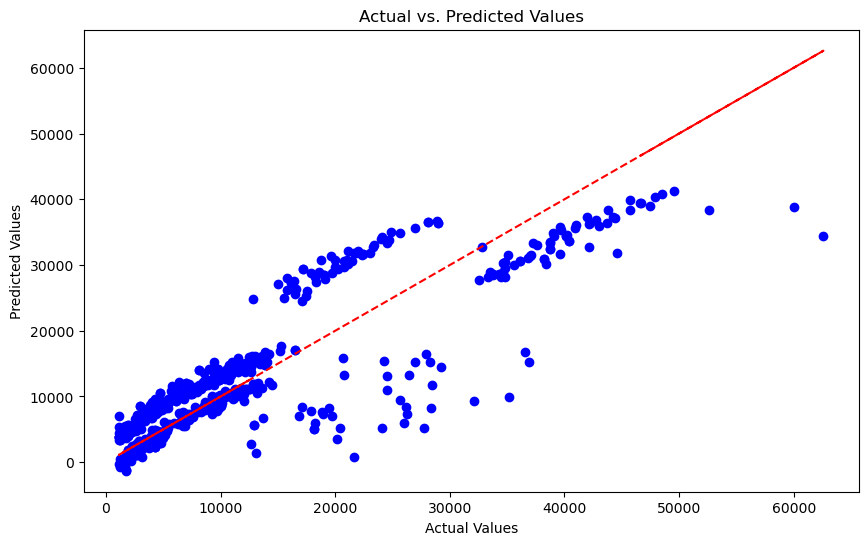

In [84]:
act_vs_pred_plot(test_pred_df['charges'], test_pred_df['charges_pred_bmi_cat'])
# Scale the cefficients
# Regulaization parameter
# Change test train split before scaling
# 

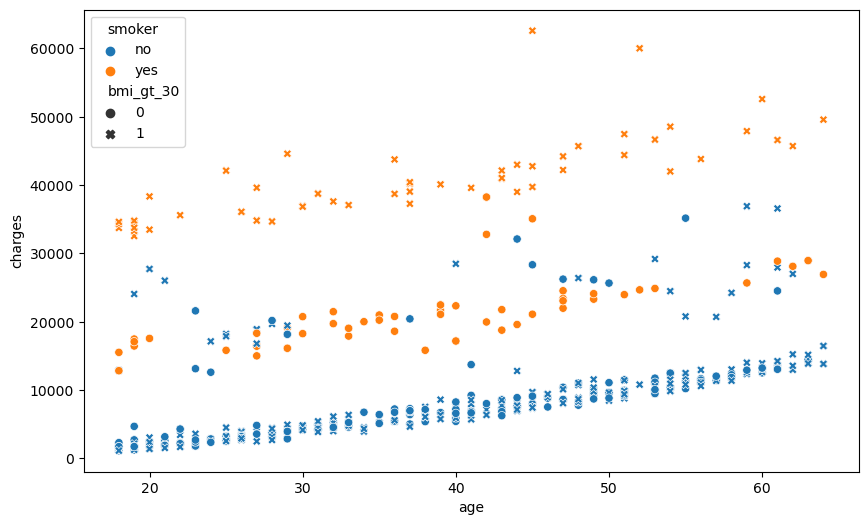

In [120]:
sns.scatterplot(data=test_pred_df, x='age', y='charges', hue='smoker', style='bmi_gt_30')
#plt.plot(test_df['charges'], test_df['charges'], color='red', linestyle='--')  # Add a line of perfect prediction (y=x)
plt.show()

In [108]:
train_pred_df.head()

,age,sex,bmi,children,smoker,region,charges,charges_pred,charges_pred_bmi_cat
1410,37,male,28.025,2,no,northwest,6203.90175,7792.769126,6833.549181
0,19,female,27.900,0,yes,southwest,16884.92400,25347.852062,24436.930808
221,53,female,33.250,0,no,northeast,10564.88450,12930.168330,13656.997810
1696,50,male,26.600,0,no,southwest,8444.47400,8779.040838,8095.556720
1625,44,male,38.060,1,no,southeast,7152.67140,11682.140044,11747.033105


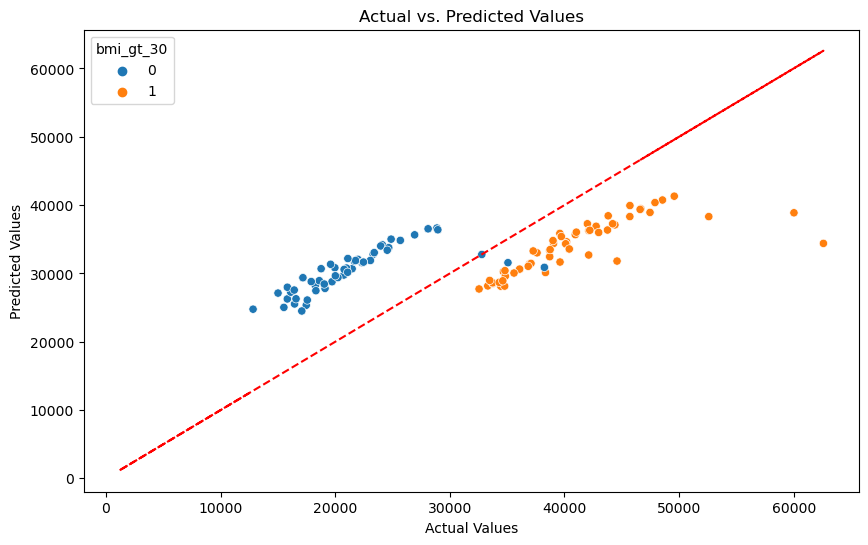

In [90]:
sns.scatterplot(data=test_pred_df[test_pred_df['smoker'] == 'yes'], x='charges', y='charges_pred_bmi_cat', hue='bmi_gt_30')
plt.plot(test_pred_df['charges'], test_pred_df['charges'], color='red', linestyle='--')  # Add a line of perfect prediction (y=x)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [117]:
# Define possible values for 'Sex', 'Smoker', and 'Age'
sex_list = [0, 1]
smoker_list = [0,1]
age_list = range(18, 64)  # Ages from 18 to 80 (inclusive)
bmi_list = range(16, 54)  # Ages from 18 to 80 (inclusive)
child_list = range(1, 6)
northwest_list = [0,1]


# Generate all possible combinations of values using itertools.product
all_combinations = list(itertools.product(age_list, sex_list, bmi_list, child_list, smoker_list, northwest_list, northwest_list, northwest_list))

# Create a DataFrame with all combinations
df_all_combinations = pd.DataFrame(all_combinations, columns=['age', 'sex', 'bmi', 'children', 'smoker'])

# Display the DataFrame
print(df_all_combinations)

        age  sex  bmi  children  smoker  northwest  southeast  southwest
0        18    0   16         1       0          0          0          0
1        18    0   16         1       0          0          0          1
2        18    0   16         1       0          0          1          0
3        18    0   16         1       0          0          1          1
4        18    0   16         1       0          1          0          0
...     ...  ...  ...       ...     ...        ...        ...        ...
279675   63    1   53         5       1          0          1          1
279676   63    1   53         5       1          1          0          0
279677   63    1   53         5       1          1          0          1
279678   63    1   53         5       1          1          1          0
279679   63    1   53         5       1          1          1          1

[279680 rows x 8 columns]


In [118]:
df_all_combinations

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,18,0,16,1,0,0,0,0
1,18,0,16,1,0,0,0,1
2,18,0,16,1,0,0,1,0
3,18,0,16,1,0,0,1,1
4,18,0,16,1,0,1,0,0
...,...,...,...,...,...,...,...,...
279675,63,1,53,5,1,0,1,1
279676,63,1,53,5,1,1,0,0
279677,63,1,53,5,1,1,0,1
279678,63,1,53,5,1,1,1,0


In [116]:
X_test_scaled_bmi_cat

,sex,smoker,bmi_gt_30,northwest,southeast,southwest,sc_age,sc_bmi,sc_children
2210,1,0,0,1,0,0,1.473981,-1.031050,-0.905443
2165,1,0,0,1,0,0,0.978697,-0.287463,-0.905443
1104,1,0,0,0,0,1,-0.153382,-0.137441,-0.905443
157,1,1,0,0,0,0,-1.497726,-0.891628,-0.905443
1249,1,1,1,0,0,0,-0.507157,0.487107,-0.086109
...,...,...,...,...,...,...,...,...,...
76,0,0,0,0,1,0,-0.719422,-0.171685,-0.086109
1097,1,0,1,0,1,0,-1.214706,0.509936,-0.905443
2117,1,0,0,0,0,1,0.978697,-1.507207,-0.086109
2607,1,0,0,0,1,0,0.058883,-0.925056,0.733224


In [ ]:
# Predict for generted dataset and overlay over actual graph
# Cross validation in Linear regression - how to do
# Hyper parameter tuning


# Comment and story board
# Export model and prediction script

# Random forest model
# Maybe a web portal using free dashboard